# Wrangle and Analyze Data

## Gather

#### 1. Gather the WeRateDogs Twitter archive by downloading the 'twitter_archive_enhanced.csv' file manually.

In [1]:
#import library
import pandas as pd

#Open the file
archive = pd.read_csv('twitter-archive-enhanced.csv')


#### 2. Gather the tweet image predictions by programmatically downloading the 'image_predictions.tsv' file using the Requests library from the given URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [2]:
#import library
import requests

#Download the file using Requests from the given URL

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [3]:
#read the file

image = pd.read_csv('image_predictions.tsv', sep = '\t')

#### 3. Gather each tweet's retweet count and favorite ("like") count by quering the Twitter API for each tweet's JSON data using Python's Tweepy library.

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [142]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append({'tweet_id': data['id_str'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count and favorite count
count = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assess

In [6]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Archive columns:
1. tweet_id: the id of the tweet;
2. in_reply_to_status_id: the id of the tweet that the dog rating tweets are in reply to;
3. in_reply_to_user_id: the twitter id that the dog rating tweets are in reply to;
4. timestamp: the time of the tweet;
5. source: the source of the tweeting;
6. text: the text of the tweet;
7. retweeted_status_id: whether this tweet is retweeted;
8. retweeted_status_user_id: if this tweet is retweeted, what is the id of the original tweeter;
9. retweeted_status_timestamp: if this tweet is retweeted, when is the original tweet;
10. expanded_urls: the urls of the tweet;
11. rating_numerator: the score rated for the dog;
12. rating_denominator: the denominator of the dog rating system;
13. name: name of the dog;
14. doggo: whether this dog is a doggo;
15. floofer: whether this dog is a floofer;
16. pupper: whether this dog is a pupper;
17. puppo: whether this dog is a puppo;

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
archive[archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [12]:
archive[archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [13]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1                                              2
https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1                                                                                                                      2
https://twitter.com/dog_rates/status/786233965241827333/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/687317306314240000/photo/1,https://twitter.com/dog_rat

In [15]:
archive[archive.expanded_urls == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


In [16]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
an                7
Toby              7
Buddy             7
Bailey            7
Jack              6
Stanley           6
Bella             6
Koda              6
Leo               6
Oscar             6
Rusty             6
Jax               6
Milo              6
Dave              6
Scout             6
Chester           5
               ... 
Liam              1
Traviss           1
Tug               1
Miley             1
Maya              1
such              1
officially        1
Billl             1
Pawnd             1
Daniel            1
DayZ              1
Lugan             1
Cleopatricia      1
Stark             1
Antony            1
Trigger           1
Barclay           1
Bradlay           1
Simba             1


In [17]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Image columns:
1. tweet_id: the id of the tweet, the last part of the tweet URL after "status/";
2. jpg_url: the website of the image;
3. img_num: number of the images;
4. p1: the algorithm's #1 prediction for the image in the tweet;
5. p1_conf: how confident the algorithm is in its #1 prediction;  
6. p1_dog: whether or not the #1 prediction is a breed of dog;
7. p2: the algorithm's #2 prediction for the image in the tweet;
8. p2_conf: how confident the algorithm is in its #2 prediction; 
9. p2_dog: whether or not the #2 prediction is a breed of dog;
10. p3: the algorithm's #3 prediction for the image in the tweet;
11. p3_conf: how confident the algorithm is in its #3 prediction; 
12. p3_dog: whether or not the #3 prediction is a breed of dog;

In [21]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image[image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
sum(image.jpg_url.duplicated())

66

In [24]:
image.jpg_url.value_counts()

https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZ

In [25]:
image[image.jpg_url == 'https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1490,782722598790725632,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False


In [26]:
image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [27]:
((image[image['p1_dog'] == False])[image['p2_dog'] == False])[image['p3_dog'] == False]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [143]:
count

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Count columns:
1. tweet_id: the id of the tweet;
2. retweet_count: the count of the retweets;
3. favorite_count: the count of the likes

In [144]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [30]:
count[count.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [31]:
count.describe()

,tweet_id,retweet_count,favorite_count
count,0,0,0
unique,0,0,0


### Quality

#### Archive table
1. Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id should be string instead of float, timestamp should be time instead of object);
2. The source values contain messy html information;
3. Inaccuracy: wrong dog names;
4. Inaccuracy: rating_numerator is from 1 to 1776;
5. Inaccuracy: rating_denominator should be 10, but there are many other values;
6. Some of the data of the archive table is redunant, since only tweets of original ratings (no retweets) that have images are wanted;

#### Image table:
1. Erroneous datatype (tweet_id should be string instead of int);
2. Duplicated image_urls;
3. Some of the images can't be recognized as dogs;

#### Count table:
1. Missing records (2340 instead of 2356)


### Tidiness

1. One variable in four columns in archive table (doggo, floofer, pupper and puppo);
2. One variable in six columns in image table (dog breed);
3. The text values of the archive table consist of both text and the url of the tweets;
4. There should be 1 table with basic information of tweets with the ratings of the dogs.

## Clean

In [67]:
# Before cleaning, make a copy of the tables

archive_clean = archive.copy()
image_clean = image.copy()

### Define
1. Correct the datatypes.

### Code

In [68]:
# Convert the datatypes of the id columns of the archive table from float to string/object

archive_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
               'retweeted_status_id', 'retweeted_status_user_id']] = archive_clean[
    ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']].astype(str)

In [69]:
# Convert the timestamp pf the archive table from object to datetime

archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [70]:
# Covert the tweet_id column of the image table from float to string

image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

### Test

In [71]:
# Check the datatypes of the archive table

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

In [72]:
# Check the datatypes of the tweet id column of the image table

image_clean.tweet_id.describe()

count                   2075
unique                  2075
top       863432100342583297
freq                       1
Name: tweet_id, dtype: object

### Define
2. Delete the retweet records by dropping the rows in which retweeted_status_id is not nan.

### Code

In [73]:
# Drop the tweet records with retweet ids.

archive_clean = archive_clean[archive_clean.retweeted_status_id == 'nan']

In [74]:
# Drop the tweet records with in_reply_to_ids.

archive_clean = archive_clean[archive_clean.in_reply_to_status_id == 'nan']

### Test

In [75]:
# check the values of retweeted_status_ids
archive_clean.retweeted_status_id.value_counts()

nan    2097
Name: retweeted_status_id, dtype: int64

In [76]:
# check the values of in_reply_to_status_ids
archive_clean.in_reply_to_status_id.value_counts()

nan    2097
Name: in_reply_to_status_id, dtype: int64

In [77]:
# check the information of the archive table
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         2097 non-null object
in_reply_to_user_id           2097 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           2097 non-null object
retweeted_status_user_id      2097 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](

### Define
3. Delete the useless columns of the archive table, including the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp, since they are all nan/null.

### Code

In [78]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                    'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

### Test

In [79]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
4. Extract the source information by removing all html anchor tags (<a..> </a>) and convert the data type to category. 

### Code

In [80]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
archive_clean.source = archive_clean.source.astype('category')

### Test

In [81]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define
5. Extract the readable text contents from the text values.

### Code

In [82]:
# replace the htmls with empty string

archive_clean.text = archive_clean.text.str.replace('https://(.*)', '')

### Test

In [83]:
archive_clean.text.value_counts()

This is Noah. He can't believe someone made this mess. Got the vacuum out for you though. Offered to help clean pup. 12/10 super good boy        1
Say hello to Andy. He can balance on one foot, obliterate u in checkers, &amp; transform into a rug. 11/10 much talents                          1
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10                                 1
Say hello to Mark. He's a good dog. Always ready to go for a walk. Excellent posture. 9/10 keep it up Mark                                       1
Say hello to Moofasa. He must be a powerful dog. Fenced in for your protection. Just got his ear pierced. 6/10                                   1
Tfw she says hello from the other side. 9/10                                                                                                     1
This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af                         

### Define
6. Replace the wrong dog names (start with lower characters) with "None". 

### Code

In [84]:
# replace the wrong names with 'None'

archive_clean.name = archive_clean.name.str.replace('^[a-z]+', 'None')

### Test

In [85]:
archive_clean['name'].value_counts()

None            707
Charlie          11
Lucy             11
Cooper           10
Oliver           10
Tucker            9
Penny             9
Lola              8
Winston           8
Sadie             8
Daisy             7
Toby              7
Bailey            6
Bo                6
Stanley           6
Oscar             6
Koda              6
Jax               6
Bella             6
Scout             5
Bentley           5
Buddy             5
Milo              5
Dave              5
Leo               5
Rusty             5
Louis             5
Chester           5
Jerry             4
Winnie            4
               ... 
Sailer            1
Lolo              1
Venti             1
Harry             1
Jiminus           1
Pawnd             1
Bradlay           1
Barclay           1
Perry             1
Levi              1
Livvie            1
Thor              1
Travis            1
Dook              1
Harrison          1
Teddy             1
Banditt           1
Kendall           1
Danny             1


### Define
7. Find the rows with rating_denominator disqual to 10 and correct them. 

### Code

In [86]:
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


#### Most of the rating_denominator != 10 are 10 times the number of the dogs. Others are due to the wrong information extraction. Those mistakes should be dealt with first.

In [87]:
archive_clean[archive_clean.rating_denominator == 7].text.value_counts()

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n    1
Name: text, dtype: int64

In [88]:
archive_clean[archive_clean.rating_denominator == 11].text.value_counts()

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10      1
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP     1
Name: text, dtype: int64

In [89]:
archive_clean[archive_clean.rating_denominator == 2].text.value_counts()

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10     1
Name: text, dtype: int64

In [90]:
archive_clean = archive_clean[archive_clean.rating_denominator != 7]

mask_2 = archive_clean.tweet_id == '740373189193256964'
archive_clean.loc[mask_2, 'rating_denominator'] = 10
archive_clean.loc[mask_2, 'rating_numerator'] = 14

mask_3 = archive_clean.tweet_id == '682962037429899265'
archive_clean.loc[mask_3, 'rating_denominator'] = 10
archive_clean.loc[mask_3, 'rating_numerator'] = 10

mask_4 = archive_clean.tweet_id == '722974582966214656'
archive_clean.loc[mask_4, 'rating_denominator'] = 10
archive_clean.loc[mask_4, 'rating_numerator'] = 13

mask_5 = archive_clean.tweet_id == '666287406224695296'
archive_clean.loc[mask_5, 'rating_denominator'] = 10
archive_clean.loc[mask_5, 'rating_numerator'] = 9

In [91]:
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,None,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [92]:
# iterate through all the remaining records whose rating_denominator is not 10

for i, row in archive_clean[archive_clean.rating_denominator != 10].iterrows():
    divisor = row.rating_denominator/10
    archive_clean.set_value(i, 'rating_denominator', 10)
    archive_clean.set_value(i, 'rating_numerator', int(row.rating_numerator/divisor))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


### Test

In [93]:
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
8. Some of the rating_numerator values are too high or too low, which need to be corrected.

### Code

In [94]:
archive_clean['rating_numerator'].value_counts()

12      490
10      439
11      418
13      288
9       154
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [95]:
# The rating_numerators higher than 14 are considered as abnormal high score.

archive_clean.query('rating_numerator > 14')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [96]:
# change the high values to the right ratings

mask_1 = archive_clean.tweet_id == '786709082849828864'
archive_clean.loc[mask_1, 'rating_numerator'] = 9.75

mask_2 = archive_clean.tweet_id == '778027034220126208'
archive_clean.loc[mask_2, 'rating_numerator'] = 11.27

mask_3 = archive_clean.tweet_id == '680494726643068929'
archive_clean.loc[mask_3, 'rating_numerator'] = 11.26

archive_clean = archive_clean[archive_clean.rating_numerator != 420]

#### Most of the tweets with abnormal low rating_numerators are not with dog images, so they can be left after melting the table with image information.

### Test

In [97]:
archive_clean.query('rating_numerator > 14')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None


### Define:
1. Make sure only one of the four dog stage columns (doggo, floofer, pupper and puppo) shows non-none value, and then melt the four columns into single column showing the value of the dog stages.

### Code

In [98]:
# found the records with more than one dog stages:

print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))
print(len(archive_clean[(archive_clean.floofer != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.floofer != 'None') & (archive_clean.pupper != 'None')]))
print(len(archive_clean[(archive_clean.puppo != 'None') & (archive_clean.pupper != 'None')]))

1
1
9
0
0
0


In [99]:
archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,floofer,None,None


In [100]:
archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo,None,None,puppo


In [101]:
archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10",https://vine.co/v/5rgu2Law2ut,12.0,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,None,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48,Twitter for iPhone,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10,None,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


In [102]:
# change the dog stage according to the text

mask_1 = archive_clean.tweet_id == '854010172552949760'
archive_clean.loc[mask_1, 'floofer'] = 'None'

mask_2 = archive_clean.tweet_id == '855851453814013952'
archive_clean.loc[mask_2, 'doggo'] = 'None'

# Since the 9 records showing both doggo and pupper are either one pupper, or both doggo and pupper, and according to
# the dogtionary, doggo and pupper are sometimes used interchangeably, set pupper column as None for these 9 records.
archive_clean['doggo'][(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')] = 'None'

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [103]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

0
0
0


In [104]:
# merge the doggo, floofer, pupper and puppo columns to a new dog_stage column

archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


### Test

In [105]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None


In [106]:
archive_clean.dog_stage.value_counts()

None       1759
pupper      230
doggo        73
puppo        24
floofer       9
Name: dog_stage, dtype: int64

In [107]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

In [108]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2095 non-null object
timestamp             2095 non-null datetime64[ns]
source                2095 non-null category
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null float64
rating_denominator    2095 non-null int64
name                  2095 non-null object
dog_stage             2095 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 135.4+ KB


### Define
2. Add the dog_breed column into the archive table according to the image predictions.

### Code

In [109]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
# Check if the p1 is the most likely image prediction

print(len(image_clean[image_clean.p1_conf < image_clean.p2_conf]))
print(len(image_clean[image_clean.p1_conf < image_clean.p3_conf]))
print(len(image_clean[image_clean.p2_conf < image_clean.p3_conf]))

0
0
0


In [111]:
# Remove the "_" from the name of the dog_breed, to make it readable

image_clean.p1 = image_clean.p1.str.replace('_', ' ').str.lower()
image_clean.p2 = image_clean.p2.str.replace('_', ' ').str.lower()
image_clean.p3 = image_clean.p3.str.replace('_', ' ').str.lower()
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [157]:
# Merge the image table to the archive table

df = pd.merge(archive_clean, image_clean, on=['tweet_id'], how='left')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [158]:
# set up new column called dog_breed, and select the values according to the image predictions
df['dog_breed'] = 'None'

# iterate through all the rows of df table
for i, row in df.iterrows():
    # check if p1_dog is true:
    if row.p1_dog:
        df.set_value(i, 'dog_breed', row.p1)
    # if p1_dog is false, check if p2_dog is true, the rating_numerator also needs to be high to make sure it's real dog image:
    elif row.p2_dog and row.rating_numerator >= 10:
        df.set_value(i, 'dog_breed', row.p2)
    # if p2_dog is false, check if p3_dog is true and if the rating is high:
    elif row.p3_dog and row.rating_numerator >= 10:
        df.set_value(i, 'dog_breed', row.p3)
    else:
        df.set_value(i, 'dog_breed', 'None')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [159]:
df.dog_breed.value_counts()

None                              360
golden retriever                  153
labrador retriever                105
pembroke                           93
chihuahua                          85
pug                                60
toy poodle                         48
chow                               46
samoyed                            42
pomeranian                         39
malamute                           33
french bulldog                     30
cocker spaniel                     30
chesapeake bay retriever           29
miniature pinscher                 22
german shepherd                    21
eskimo dog                         20
staffordshire bullterrier          20
siberian husky                     20
maltese dog                        19
cardigan                           19
beagle                             19
shetland sheepdog                  18
shih-tzu                           18
italian greyhound                  17
rottweiler                         17
kuvasz      

In [160]:
# if the rating_numerator is less than 7, and there is no dog_name, dog_stage or dog_breed, it's considered as not_dog
# and need to be removed from the dataframe

# get the index list of the tweets considered showing no_dog images
df[df.rating_numerator < 7][df.name == 'None'][df.dog_stage == 'None'][df.dog_breed == 'None'].index


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Int64Index([ 246,  707,  783, 1030, 1233, 1351, 1399, 1442, 1522, 1568, 1595,
            1617, 1624, 1655, 1677, 1687, 1689, 1695, 1727, 1734, 1761, 1781,
            1786, 1790, 1816, 1821, 1824, 1836, 1854, 1864, 1884, 1897, 1901,
            1924, 1929, 1944, 1964, 1979, 1981, 1984, 2001, 2016, 2044, 2049,
            2061, 2065, 2069, 2073, 2077, 2088],
           dtype='int64')

In [161]:
# remove those record from the dataframe

df = df.drop(df.index[[246,  707,  783, 1030, 1233, 1351, 1399, 1442, 1522, 1568, 1595,
            1617, 1624, 1655, 1677, 1687, 1689, 1695, 1727, 1734, 1761, 1781,
            1786, 1790, 1816, 1821, 1824, 1836, 1854, 1864, 1884, 1897, 1901,
            1924, 1929, 1944, 1964, 1979, 1981, 1984, 2001, 2016, 2044, 2049,
            2061, 2065, 2069, 2073, 2077, 2088]])

In [162]:
# delete the unnecessary columns

df = df.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)


### Test

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2094
Data columns (total 10 columns):
tweet_id              2045 non-null object
timestamp             2045 non-null datetime64[ns]
source                2045 non-null category
text                  2045 non-null object
expanded_urls         2042 non-null object
rating_numerator      2045 non-null float64
rating_denominator    2045 non-null int64
name                  2045 non-null object
dog_stage             2045 non-null category
dog_breed             1919 non-null object
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 148.2+ KB


### Define
3. Add the retweet_count and favorite_count columns into the df table to make the information completed.

### Code

In [164]:
count_clean = count.copy()
count_clean.retweet_count = count_clean.retweet_count.astype(int)
count_clean.favorite_count = count_clean.favorite_count.astype(int)

In [165]:
# Merge the count table to the archive table

df = pd.merge(df, count_clean, on=['tweet_id'])
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,labrador retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,basset,9774,41048


### Test

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2044
Data columns (total 12 columns):
tweet_id              2045 non-null object
timestamp             2045 non-null datetime64[ns]
source                2045 non-null category
text                  2045 non-null object
expanded_urls         2042 non-null object
rating_numerator      2045 non-null float64
rating_denominator    2045 non-null int64
name                  2045 non-null object
dog_stage             2045 non-null category
dog_breed             1919 non-null object
retweet_count         2045 non-null int64
favorite_count        2045 non-null int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 180.1+ KB


## Data storing

In [167]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Data visualization

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2044
Data columns (total 12 columns):
tweet_id              2045 non-null object
timestamp             2045 non-null datetime64[ns]
source                2045 non-null category
text                  2045 non-null object
expanded_urls         2042 non-null object
rating_numerator      2045 non-null float64
rating_denominator    2045 non-null int64
name                  2045 non-null object
dog_stage             2045 non-null category
dog_breed             1919 non-null object
retweet_count         2045 non-null int64
favorite_count        2045 non-null int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 260.1+ KB


### 1. Analyzing the number of tweets over the time:

#### 1)  The line chart shows that the tweet number gradually decreased over time.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime


In [192]:
# Make sure timestamp works for the groupby function by date.
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
month_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
month_tweets = month_tweets[['timestamp', 'tweet_id']]
month_tweets.head()

,timestamp,tweet_id
0,2015-11-30,269
1,2015-12-31,355
2,2016-01-31,181
3,2016-02-29,120
4,2016-03-31,131


In [193]:
month_tweets.sum()

tweet_id    2045
dtype: int64

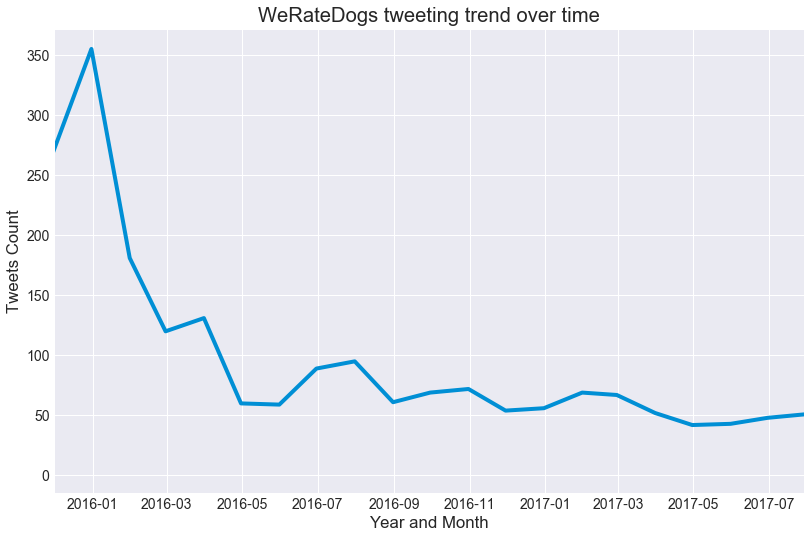

In [210]:
# Line plot of Time vs Tweets.

sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 
plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')
plt.plot(month_tweets.timestamp, month_tweets.tweet_id)
plt.title('WeRateDogs tweeting trend over time')
plt.savefig('tweet_over_time');

#### 2)  The line chart shows that the retweets and likes greatly increased over time.

In [211]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
month_retweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).sum().reset_index()
month_retweets = month_retweets[['timestamp', 'retweet_count']]
month_favorites = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).sum().reset_index()
month_favorites = month_favorites[['timestamp', 'favorite_count']]

In [212]:
month_retweets

,timestamp,retweet_count
0,2015-11-30,128641
1,2015-12-31,560206
2,2016-01-31,302252
3,2016-02-29,187500
4,2016-03-31,232596
5,2016-04-30,97674
6,2016-05-31,132613
7,2016-06-30,369607
8,2016-07-31,270512
9,2016-08-31,220630


In [213]:
month_favorites

,timestamp,favorite_count
0,2015-11-30,310743
1,2015-12-31,1290437
2,2016-01-31,759883
3,2016-02-29,497969
4,2016-03-31,615776
5,2016-04-30,280103
6,2016-05-31,366741
7,2016-06-30,839029
8,2016-07-31,710084
9,2016-08-31,619401


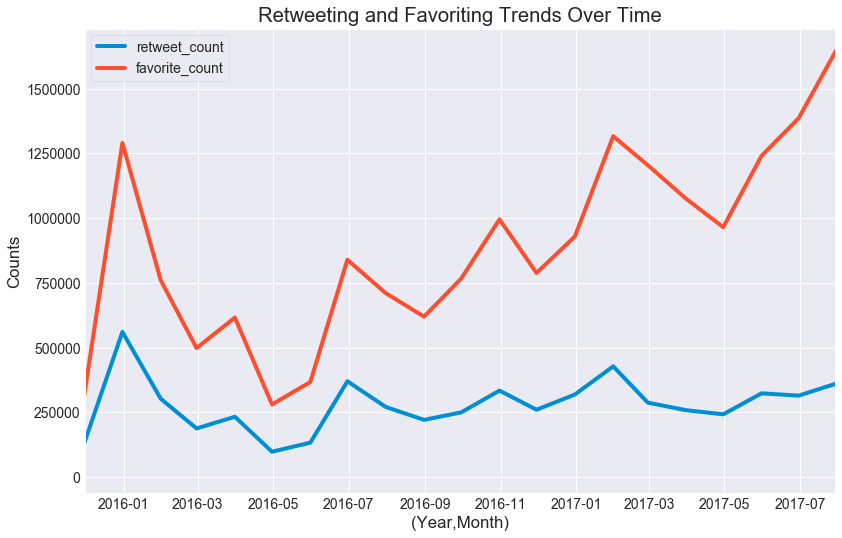

In [214]:
# Line chart shows the retweet and favorite trends over time.

plt.figure(figsize=(12, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 
plt.xlabel('(Year,Month)')
plt.ylabel('Counts')
plt.plot(month_retweets.timestamp, month_retweets.retweet_count)
plt.plot(month_favorites.timestamp, month_favorites.favorite_count)
plt.legend()
plt.title('Retweeting and Favoriting Trends Over Time')
plt.savefig('ret_fav_over_time');

### 2. Analyzing the tweet status associated with different sources:

#### 1)  The pie chart shows that the majority of the twitters were using iphone.

In [215]:
df['source'].value_counts()

Twitter for iPhone     1913
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

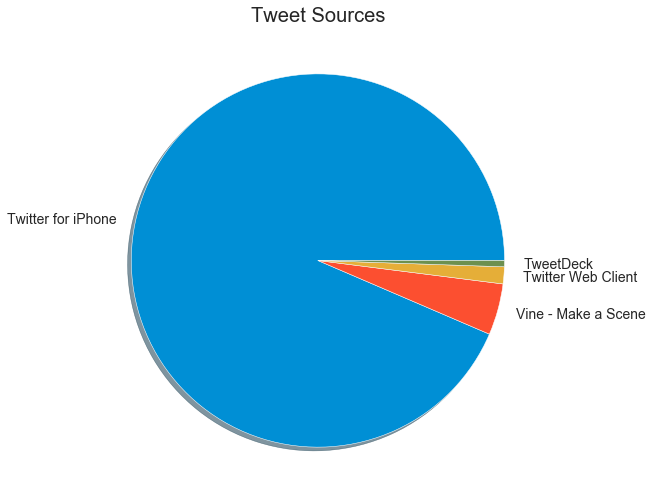

In [216]:
# the pie chasrt showing the counts of different sources.

f,ax=plt.subplots(1,figsize=(12,8))
df['source'].value_counts().plot.pie(shadow=True)
ax.set_title('Tweet Sources')
ax.set_ylabel('')
plt.savefig('tweet_source')

#### 2) Bar charts showed that vine-make the scene displayed the highest retweet number, while twitter for iphone received the highest favorite count.

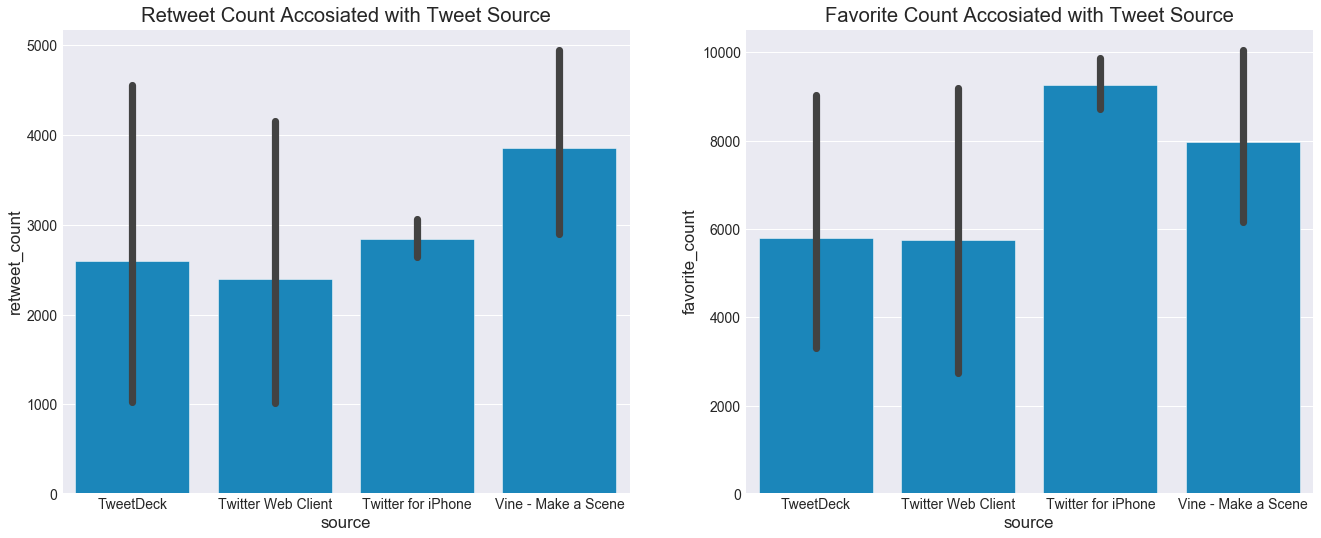

In [218]:
# Bar charts were drawn to show the retweet_count and favorite_counts associated with tweet sources.

f,ax=plt.subplots(1,2,figsize=(20,8))
base_color = sns.color_palette()[0]
sns.barplot('source','retweet_count',data=df,ax=ax[0], color = base_color)
ax[0].set_title('Retweet Count Accosiated with Tweet Source')
sns.barplot('source','favorite_count',data=df,ax=ax[1], color = base_color)
ax[1].set_title('Favorite Count Accosiated with Tweet Source')
plt.savefig('ret_fav_tweet_source')

### 3. Analyzing the tweet status associated with dog stages.

#### 1) The pie chart shows that among the known stages, pupper is the most common stage in the tweets.

In [284]:
df['dog_stage'].value_counts()

None       1707
pupper      230
doggo        73
puppo        24
floofer       9
Name: dog_stage, dtype: int64

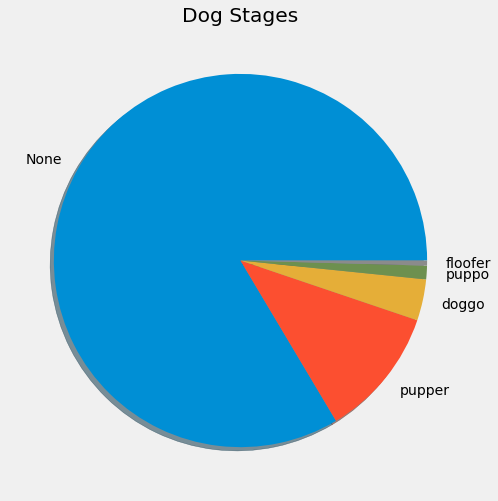

In [299]:
# the pie chart shows number of tweets associated with the different dog stages.

f,ax=plt.subplots(1,figsize=(12,8))
df['dog_stage'].value_counts().plot.pie(shadow=True)
ax.set_title('Dog Stages')
ax.set_ylabel('')
plt.savefig('dog_stages')

#### 2) Bar charts showed tweets rating for puppers displayed the lowest ratings.


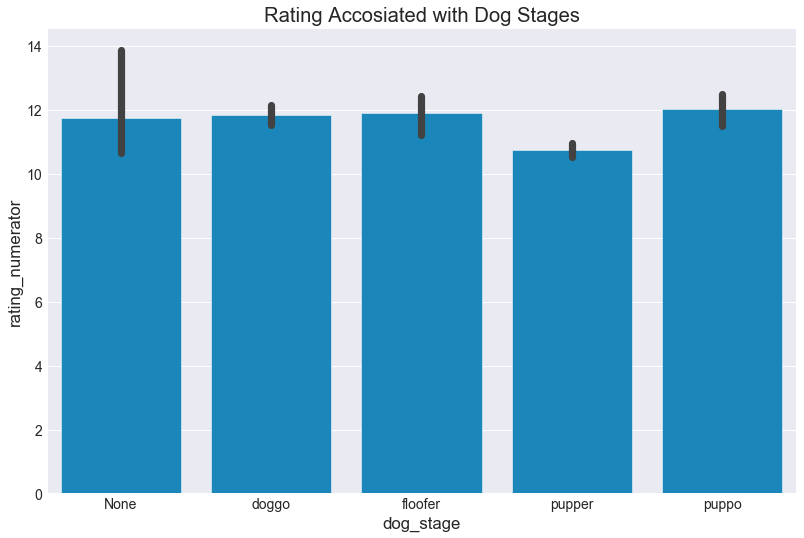

In [231]:
# Bar chart was drawn to show the rating_numerators associated with dog_stages.

f,ax=plt.subplots(1, figsize=(12,8))
base_color = sns.color_palette()[0]
sns.barplot('dog_stage','rating_numerator',data=df, color = base_color)
ax.set_title('Rating Accosiated with Dog Stages')
plt.savefig('rating_dog_stages')

#### 3) Bar charts showed that both retweet_count and favorite_count are higher for tweets of doggo and puppo, compared with floofer and pupper.


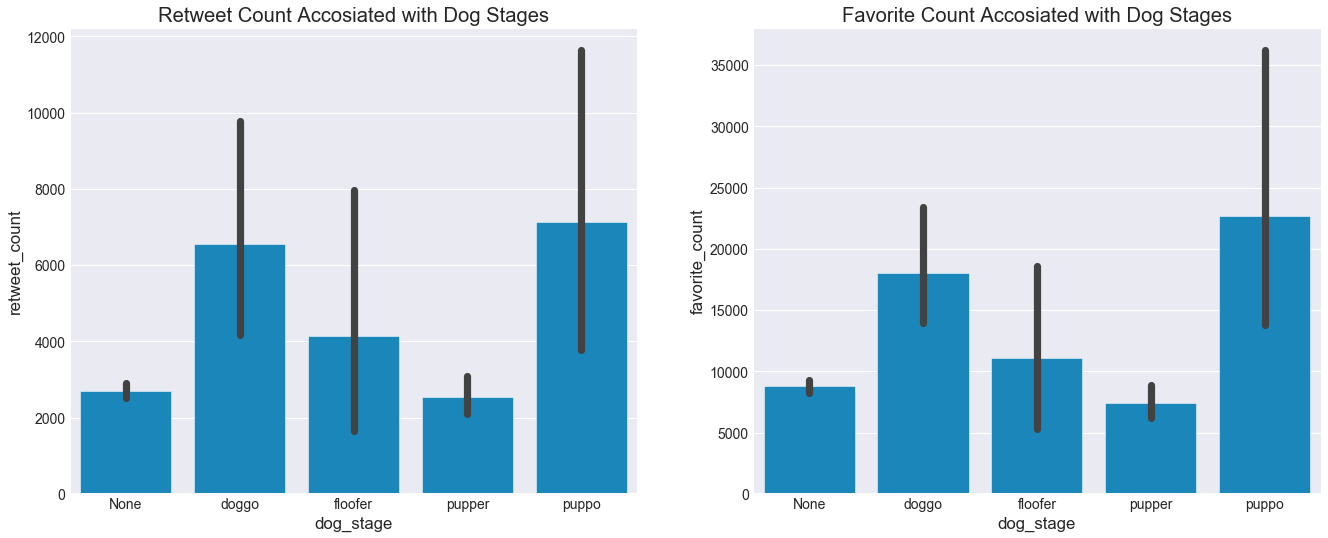

In [220]:
# Bar charts were drawn to show the retweet_count and favorite_count associated with dog_stages.

f,ax=plt.subplots(1,2,figsize=(20,8))
base_color = sns.color_palette()[0]
sns.barplot('dog_stage','retweet_count',data=df,ax=ax[0],color = base_color)
ax[0].set_title('Retweet Count Accosiated with Dog Stages')
sns.barplot('dog_stage','favorite_count',data=df,ax=ax[1],color = base_color)
ax[1].set_title('Favorite Count Accosiated with Dog Stages')
plt.savefig('ret_fav_dog_stage')


### 3. Analyzing the tweet status associated with dog breeds.

#### 1)  The pie chart shows that among the known breeds, the most common ones are golden retriever, labrador retrieve, pembroke, chihuahua, pug, and so on.

In [221]:
df['dog_breed'].value_counts()

None                              310
golden retriever                  153
labrador retriever                105
pembroke                           93
chihuahua                          85
pug                                60
toy poodle                         48
chow                               46
samoyed                            42
pomeranian                         39
malamute                           33
french bulldog                     30
cocker spaniel                     30
chesapeake bay retriever           29
miniature pinscher                 22
german shepherd                    21
eskimo dog                         20
staffordshire bullterrier          20
siberian husky                     20
maltese dog                        19
cardigan                           19
beagle                             19
shetland sheepdog                  18
shih-tzu                           18
italian greyhound                  17
rottweiler                         17
kuvasz      

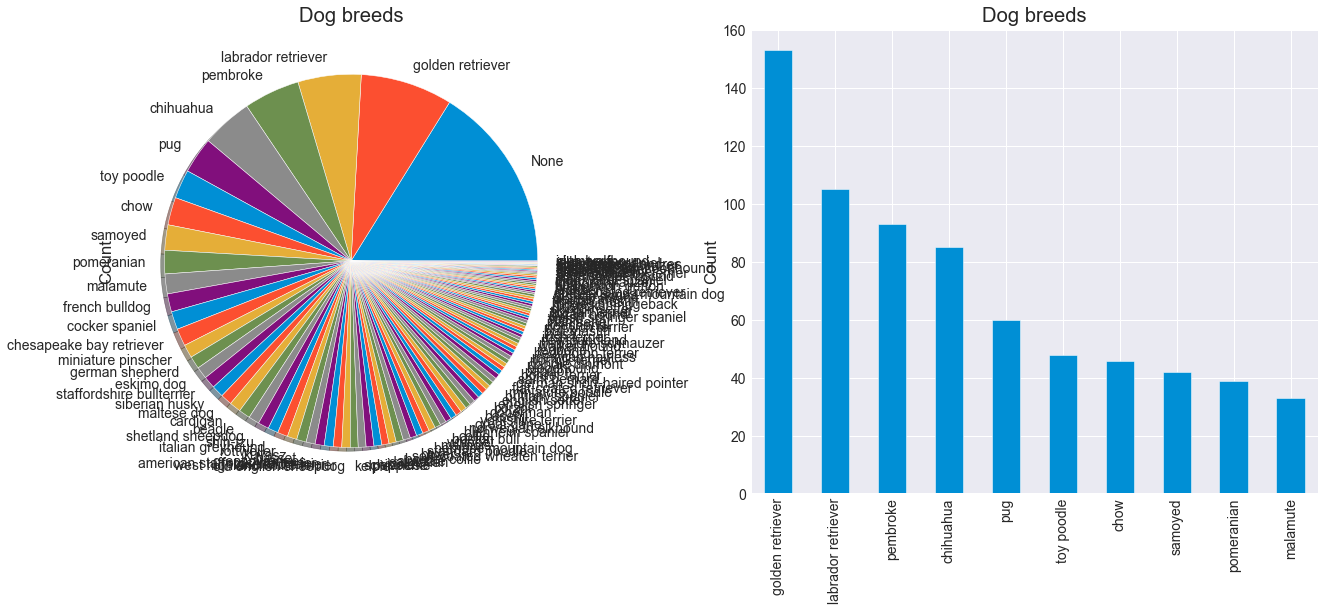

In [223]:
# the pie chasrt shows the distribution of different dog_breeds.

f,ax=plt.subplots(1,2,figsize=(20,8))
df['dog_breed'].value_counts().plot.pie(shadow=True, ax=ax[0])
ax[0].set_title('Dog breeds')
ax[0].set_ylabel('Count')
base_color = sns.color_palette()[0]
df['dog_breed'].value_counts()[1:11].plot.bar(ax=ax[1],color = base_color)
ax[1].set_title('Dog breeds')
ax[1].set_ylabel('Count')
plt.savefig('dog_breeds')


#### 2)  The bar charts showed that among the top 10 breeds, samoyed received the highest ratings.

In [224]:
# select the records of the top 10 dog_breeds according to the tweet counts

top_breed = df[(df.dog_breed == 'golden retriever') | (df.dog_breed == 'labrador retriever') | 
               (df.dog_breed == 'pembroke') | (df.dog_breed == 'chihuahua') | 
               (df.dog_breed == 'pug') | (df.dog_breed == 'toy poodle') | 
               (df.dog_breed == 'chow') | (df.dog_breed == 'samoyed') | 
               (df.dog_breed == 'pomeranian') | (df.dog_breed == 'malamute')]

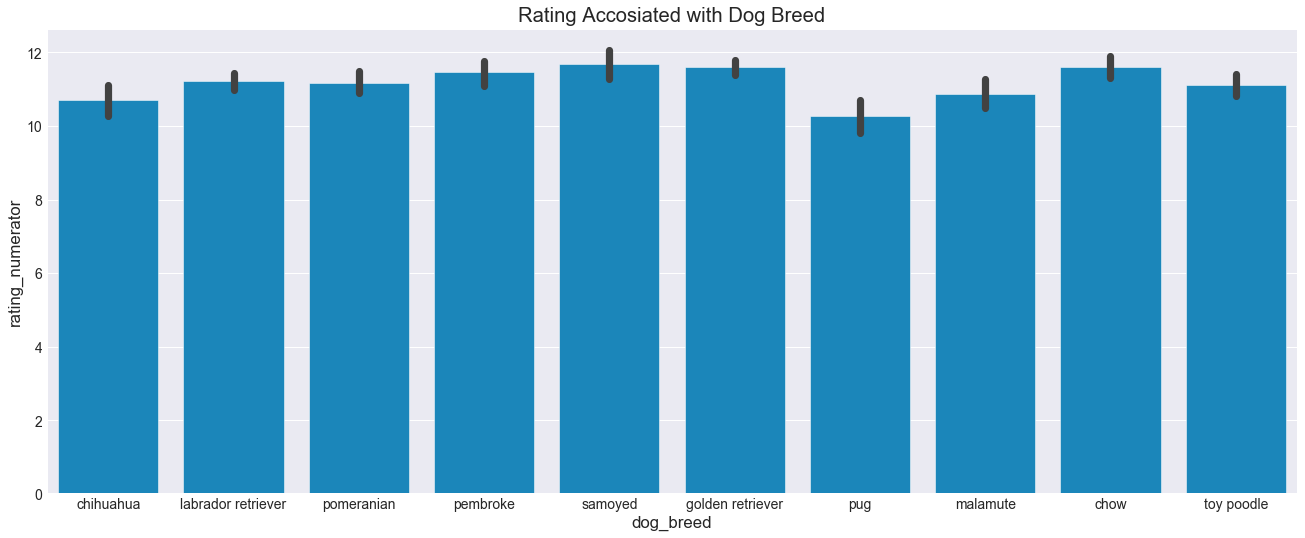

In [225]:
# Bar chart was drawn to show the rating_numerators associated with top 10 dog_breeds.

f,ax=plt.subplots(1, figsize=(20,8))
base_color = sns.color_palette()[0]
sns.barplot('dog_breed','rating_numerator',data=top_breed, color=base_color)
ax.set_title('Rating Accosiated with Dog Breed')
plt.savefig('rating_dog_breeds')


#### 3)  The bar charts showed that among the top 10 breeds, samoyed received the highest retweet_count.

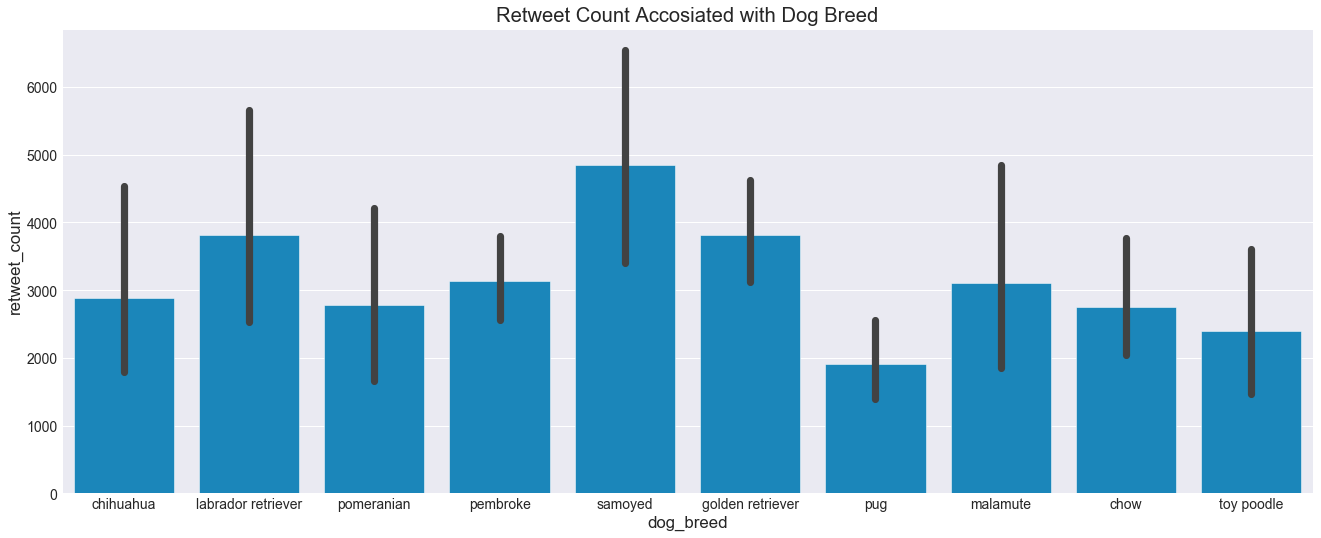

In [226]:
# Bar chart was drawn to show the retweet_count associated with top 10 dog_breeds.

f,ax=plt.subplots(1, figsize=(20,8))
base_color = sns.color_palette()[0]
sns.barplot('dog_breed','retweet_count',data=top_breed, color = base_color)
ax.set_title('Retweet Count Accosiated with Dog Breed')
plt.savefig('ret_dog_breeds')


#### 4)  The bar charts showed that among the top 10 breeds, samoyed received the highest favorite_count.

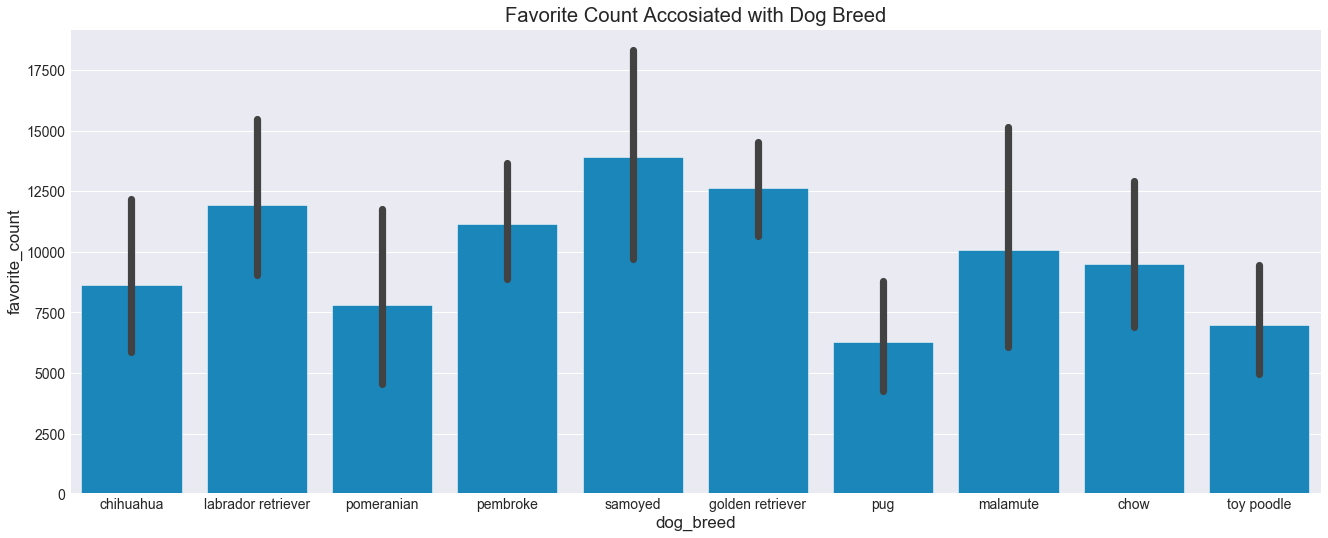

In [227]:
# Bar chart was drawn to show the favorite
#### 3)  The bar charts showed that among the top 10 breeds, samoyed received the highest retweet_count._count associated with top 10 dog_breeds.

f,ax=plt.subplots(1, figsize=(20,8))
base_color = sns.color_palette()[0]
sns.barplot('dog_breed','favorite_count',data=top_breed, color = base_color)
ax.set_title('Favorite Count Accosiated with Dog Breed')
plt.savefig('fav_dog_breeds')

### 3. Analyzing the number of tweets with different ratings.

#### 1)  The bar chart shows that the amount of tweets giving 12 as rating_numberator is more than others, which is followed by tweets with rating_numerators of 10 and 11.

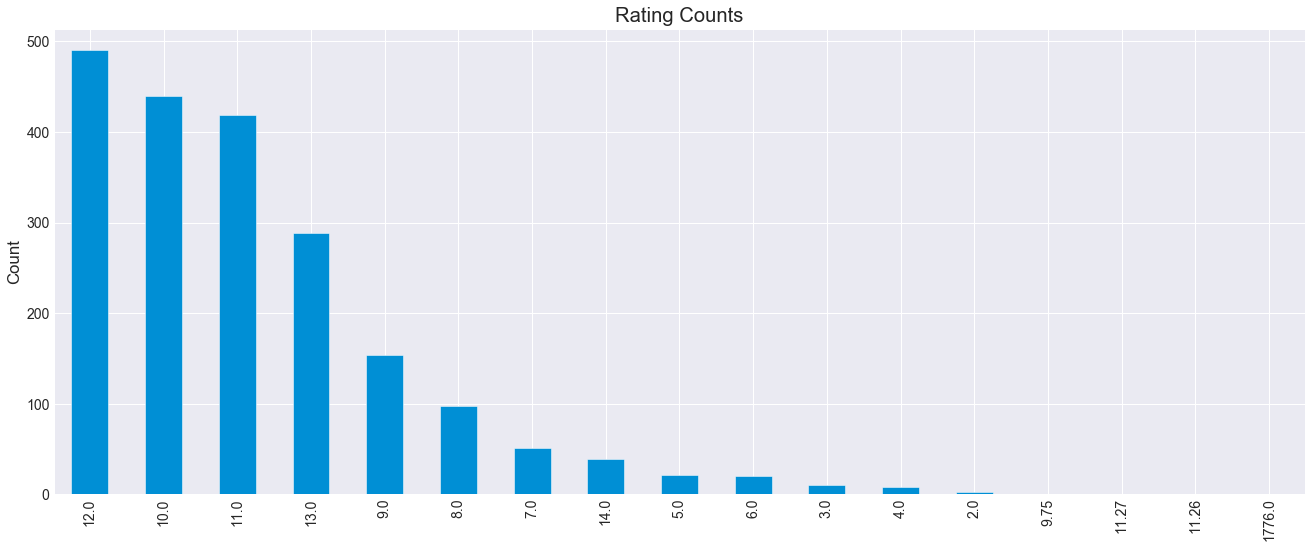

In [228]:
# the tweet number associated with rating_numerators was shown as bar chart

f, ax = plt.subplots(1,figsize=(20, 8))
base_color = sns.color_palette()[0]
df['rating_numerator'].value_counts().plot.bar(ax=ax,color = base_color)
ax.set_title('Rating Counts')
ax.set_ylabel('Count')
plt.savefig('ratings')

#### 2)  Except for the special cases of ratings, both retweet number and favorite numbers of the tweets went up with the increase of the rating_numerators.

In [229]:
# select the records excluding the special ratings:

normal_rating = df[(df.rating_numerator != 2.0) & (df.rating_numerator != 9.75) & 
               (df.rating_numerator != 11.27) & (df.rating_numerator != 11.26) & 
               (df.rating_numerator != 11.27) & (df.rating_numerator != 1776)]

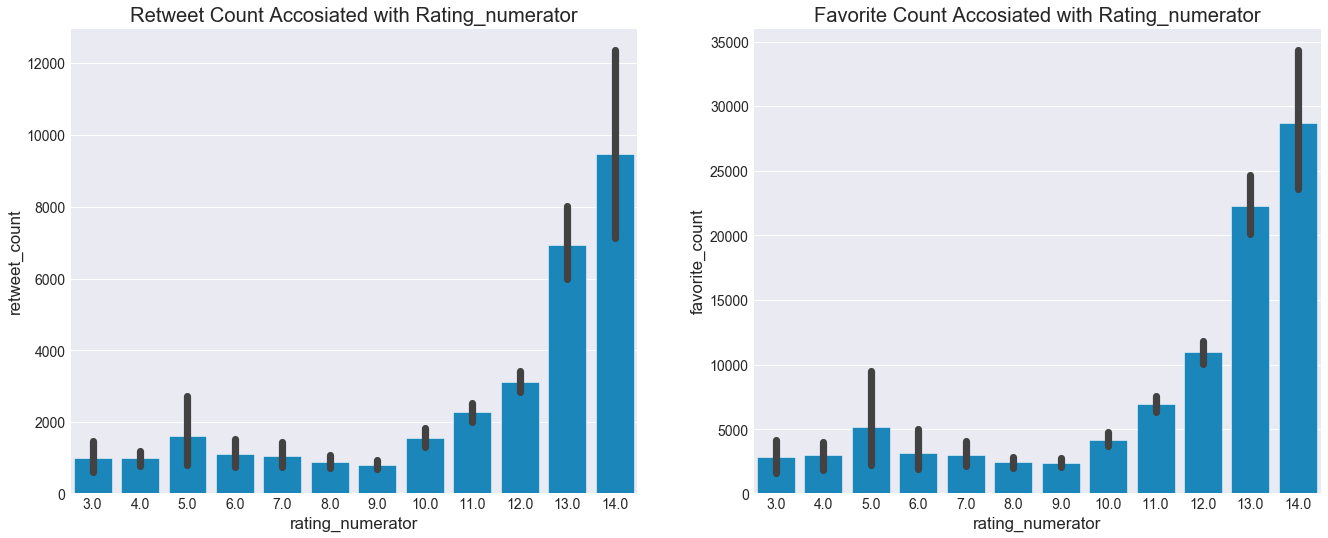

In [230]:
# Bar charts show the association of retweet_count and favorite_count with the rating_numerators.

f,ax=plt.subplots(1,2,figsize=(20,8))
base_color = sns.color_palette()[0]
sns.barplot('rating_numerator','retweet_count',data=normal_rating,ax=ax[0], color = base_color)
ax[0].set_title('Retweet Count Accosiated with Rating_numerator')
sns.barplot('rating_numerator','favorite_count',data=normal_rating,ax=ax[1], color = base_color)
ax[1].set_title('Favorite Count Accosiated with Rating_numerator')
plt.savefig('ret_fav_ratings')